<a href="https://colab.research.google.com/github/gnbhub/gnbai2020w/blob/main/week2/2%EC%A3%BC%EC%B0%A8_%EA%B9%80%EB%AF%B8%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNB AI Study 2주차
California housing : Regression


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm, probplot, skew
from IPython.display import display

from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [3]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Distribution of training data

In [5]:
train_df.columns.values.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

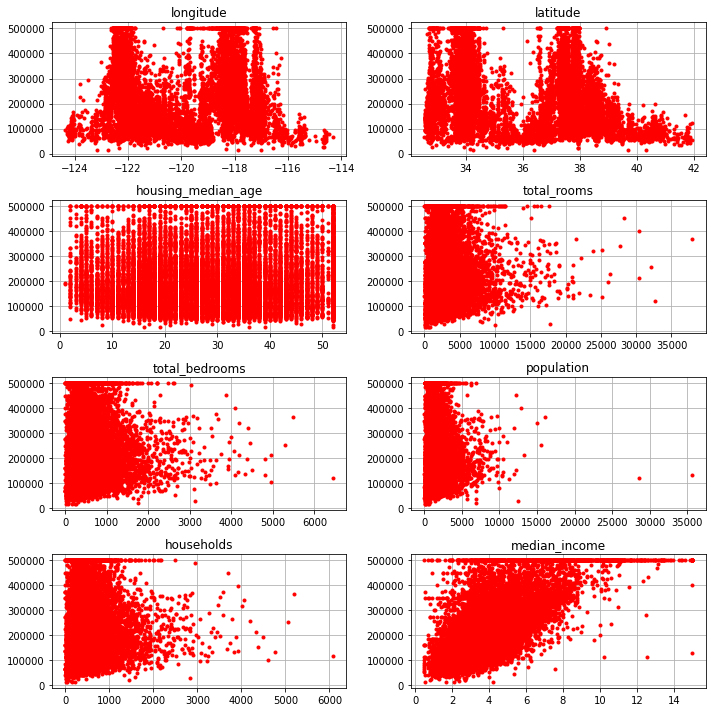

In [6]:
def plot_df(df):
    features = df.columns.values.tolist()
    target = features.pop()

    plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        plt.subplot(4, 2, i+1)
        plt.grid()
        plt.plot(df[feature], df[target], 'r.')
        plt.title(feature)
    plt.tight_layout()
    plt.show()
    plt.close()

plot_df(train_df)

In [7]:
train_df['population'] >= 20000

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Name: population, Length: 17000, dtype: bool

In [8]:
train_df[train_df['population'] >= 20000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2274,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0


In [9]:
train_df[train_df['population'] >= 20000].index

Int64Index([2274, 12772], dtype='int64')

In [10]:
# treating out liers(이상값)

train_df = train_df.drop(train_df[train_df['population'] >= 20000].index)

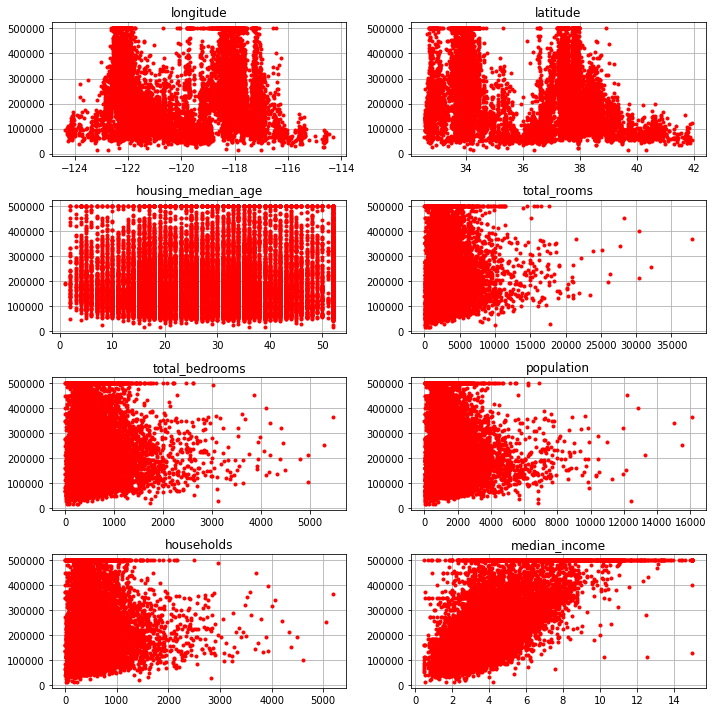

In [11]:
plot_df(train_df)

## Target variable analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


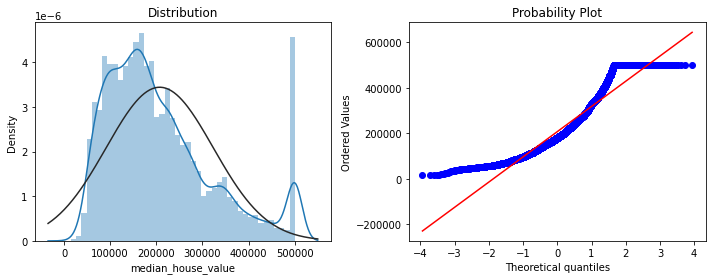

In [12]:
def plot_hist_prob(df, feature):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)

    # plot histogram
    sns.distplot(df[feature], fit=norm)
    plt.title('Distribution')

    plt.subplot(1, 2, 2)
    probplot(df[feature], plot=plt)

    plt.tight_layout()
    plt.show()
    plt.close()

target = 'median_house_value'
plot_hist_prob(train_df, target)

In [13]:
#log-transformation
#log(1+x)
train_df[target] = np.log1p(train_df[target])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


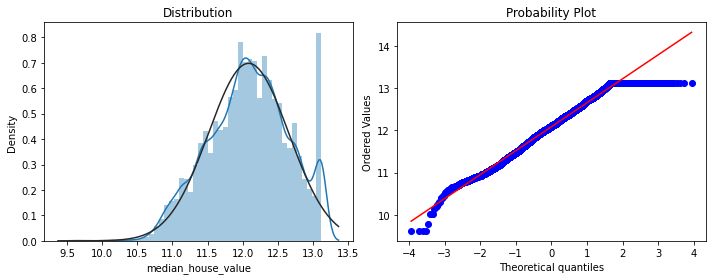

In [15]:
plot_hist_prob(train_df, target)

## Feature engineering

In [16]:
full_df = pd.concat([
    train_df.drop(target, axis = 1),
    test_df.drop(target, axis = 1)
])

full_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [18]:
# skewness

def print_skewness():
    feats = full_df.columns.values.tolist()
    skewed_feats = full_df[feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    display(skewed_feats)

print_skewness()

total_rooms           3.930562
total_bedrooms        3.286475
households            3.231976
population            3.226013
median_income         1.636937
latitude              0.469927
housing_median_age    0.057776
longitude            -0.303023
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


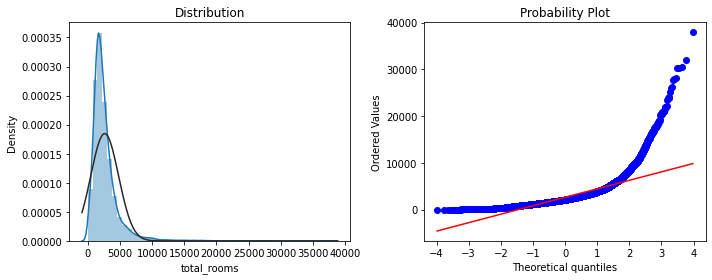

In [19]:
plot_hist_prob(full_df, 'total_rooms')

In [21]:
# boxcox transformation

def fixing_skewness():
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax

    feats = full_df.columns.values.tolist()
    skewed_feats = full_df[feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    
    high_skew = skewed_feats[skewed_feats > 1]

    for feat in high_skew.index:
        full_df[feat] = boxcox1p(full_df[feat], boxcox_normmax(full_df[feat]+1))

fixing_skewness()

In [22]:
print_skewness()

latitude              0.469927
total_bedrooms        0.111806
total_rooms           0.109239
households            0.103211
population            0.098523
housing_median_age    0.057776
median_income        -0.005347
longitude            -0.303023
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


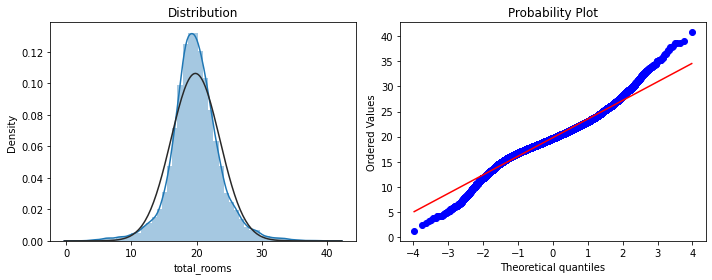

In [23]:
plot_hist_prob(full_df, 'total_rooms')

In [24]:
full_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,25.363016,17.377705,17.635148,14.011836,0.835193
1,-114.47,34.40,19.0,27.445129,19.354422,18.195048,13.928676,0.936432
2,-114.56,33.69,17.0,14.598093,9.603326,12.554291,8.882993,0.885849
3,-114.57,33.64,14.0,17.911356,11.805375,14.382370,11.089628,1.246235
4,-114.57,33.57,20.0,17.756645,11.686932,15.249883,11.635321,0.966043
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,17.743298,14.287118,18.778910,15.134445,0.721303
2996,-118.14,34.06,27.0,24.941418,16.572810,25.106248,17.757043,1.280893
2997,-119.70,36.30,10.0,15.814389,10.056552,15.740910,10.992369,1.059720
2998,-117.12,34.10,40.0,7.823240,3.699959,6.304133,3.804379,1.260250


In [25]:
scaler = StandardScaler()
full_df.loc[:] = scaler.fit_transform(full_df)

full_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.623441,-0.672627,-1.083286,1.480233,1.706900,-0.230818,0.169856,-1.758411
1,2.543582,-0.574318,-0.765359,2.035311,2.455572,-0.081288,0.141070,-1.374958
2,2.498662,-0.906696,-0.924322,-1.389630,-1.237611,-1.587739,-1.605496,-1.566545
3,2.493671,-0.930103,-1.162768,-0.506335,-0.403595,-1.099522,-0.841668,-0.201552
4,2.493671,-0.962872,-0.685877,-0.547580,-0.448455,-0.867840,-0.652776,-1.262803
...,...,...,...,...,...,...,...,...
2995,-0.146656,-0.564955,-0.447432,-0.551138,0.536354,0.074641,0.558447,-2.189780
2996,0.711824,-0.733485,-0.129505,1.367837,1.402049,1.764454,1.466261,-0.070280
2997,-0.066798,0.315145,-1.480695,-1.065373,-1.065954,-0.736703,-0.875335,-0.907996
2998,1.220923,-0.714759,0.903758,-3.195765,-3.473485,-3.256939,-3.363461,-0.148469


In [27]:
x_train = full_df[:len(train_df)]
x_test  = full_df[len(train_df):]

train_df = pd.concat([x_train, train_df[target]], axis=1)
test_df  = pd.concat([x_test, test_df[target]], axis=1)

del x_train, x_test

## AutoML with Pycaret

In [ ]:
!pip install pycaret

In [30]:
from pycaret.utils import enable_colab, check_metric
from pycaret.regression import *

In [31]:
enable_colab()

Colab mode enabled.


In [32]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.623441,-0.672627,-1.083286,1.480233,1.706900,-0.230818,0.169856,-1.758411,11.110969
1,2.543582,-0.574318,-0.765359,2.035311,2.455572,-0.081288,0.141070,-1.374958,11.291044
2,2.498662,-0.906696,-0.924322,-1.389630,-1.237611,-1.587739,-1.605496,-1.566545,11.358620
3,2.493671,-0.930103,-1.162768,-0.506335,-0.403595,-1.099522,-0.841668,-0.201552,11.203693
4,2.493671,-0.962872,-0.685877,-0.547580,-0.448455,-0.867840,-0.652776,-1.262803,11.089821
...,...,...,...,...,...,...,...,...,...
16995,-2.342770,2.318776,1.857540,0.023189,-0.187857,-0.384780,-0.188402,-0.847382,11.620892
16996,-2.347761,2.370271,0.585831,0.105599,0.236958,-0.001115,0.147503,-0.708898,11.277216
16997,-2.362734,2.908630,-0.924322,0.295703,0.245455,0.058325,0.118385,-0.312980,11.548302
16998,-2.362734,2.889904,-0.765359,0.292946,0.303904,0.120510,0.188815,-1.206272,11.359786


In [33]:
reg = setup(data=train_df , target= 'median_house_value' )

,Description,Value
0,session_id,6637
1,Target,median_house_value
2,Original Data,"(16998, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11898, 8)"


In [34]:
best_3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1531,0.0485,0.2200,0.8503,0.0170,0.0127,4.779
lightgbm,Light Gradient Boosting Machine,0.1611,0.0522,0.2284,0.8386,0.0176,0.0134,0.214
xgboost,Extreme Gradient Boosting,0.1598,0.0523,0.2285,0.8384,0.0177,0.0133,3.903
rf,Random Forest Regressor,0.1608,0.0536,0.2313,0.8345,0.0178,0.0134,5.475
et,Extra Trees Regressor,0.1720,0.0586,0.2419,0.8189,0.0186,0.0143,2.421
gbr,Gradient Boosting Regressor,0.1914,0.0673,0.2594,0.7917,0.0200,0.0159,1.792
knn,K Neighbors Regressor,0.2167,0.0891,0.2984,0.7243,0.0230,0.0180,0.074
lr,Linear Regression,0.2372,0.0996,0.3155,0.6922,0.0244,0.0198,0.325
ridge,Ridge Regression,0.2372,0.0996,0.3155,0.6922,0.0244,0.0198,0.019
br,Bayesian Ridge,0.2372,0.0996,0.3155,0.6922,0.0244,0.0198,0.019


In [35]:
blended = blend_models(estimator_list=best_3, fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1572,0.0495,0.2224,0.8480,0.0172,0.0131
1,0.1553,0.0491,0.2217,0.8448,0.0171,0.0129
2,0.1570,0.0510,0.2258,0.8450,0.0175,0.0131
Mean,0.1565,0.0499,0.2233,0.8459,0.0173,0.0130
SD,0.0008,0.0008,0.0018,0.0015,0.0002,0.0001


In [36]:
pred = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1547,0.0495,0.2225,0.8518,0.0172,0.0129


In [37]:
final_model = finalize_model(blended)

In [38]:
predictions = predict_model(final_model, data=test_df)

In [39]:
predictions.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Label
0,-1.239722,0.816052,-0.129505,0.867908,0.582140,0.374182,0.555823,1.397282,344700.0,12.956171
1,0.631966,-0.639857,1.142204,-0.498552,-0.515856,-0.537079,-0.579865,0.059820,176500.0,12.165663
2,0.876533,-0.864563,-0.129505,0.742244,0.176407,0.320667,0.241569,1.107858,270500.0,12.525428
3,0.602019,-0.845838,-0.050023,-3.441488,-3.428861,-3.215307,-3.506875,1.234294,330000.0,12.495290
4,-0.051824,0.329189,-0.765359,-0.748750,-0.826367,-0.471742,-0.781667,-0.380637,81700.0,11.231471


In [40]:
check_metric(predictions['median_house_value'], np.expm1(predictions['Label']), 'R2')

0.8213

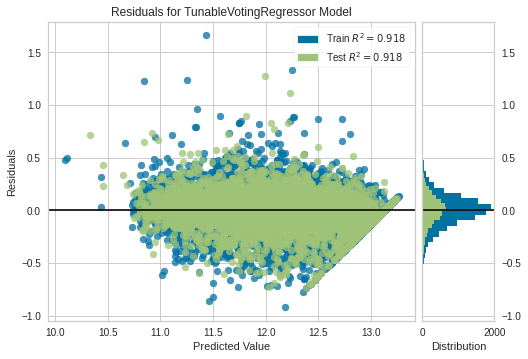

In [41]:
plot_model(final_model)